In [65]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig_size= (15, 20)
plt.rcParams["figure.figsize"] = fig_size

def one_hot(x, depth=10): return np.eye(depth)[x].reshape(x.shape + (depth,))

# K-means clustering algorithm

* Choose **k** initial centroids in the space of the input dataset 
* Repeat
    1. **E-step**: put each pattern from the input dataset in a cluster defined by its nearest centroid. 
    2. **M-step**: move each centroid so to minimize its distance from all the patterns in that cluster.

### The data


Number of patterns: 2500
Each pattern is a 2D vector



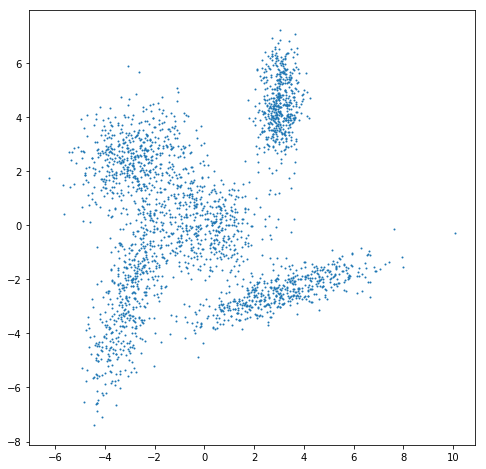

In [11]:
dataset=np.loadtxt("dataset.txt")
print "\nNumber of patterns: %d" % dataset.shape[0]
print "Each pattern is a %dD vector\n" % dataset.shape[1]
plt.figure(figsize=(8,8))
plt.scatter(*dataset.T, s=1)

### The kmeans algorithm

In [12]:
class kmeans:

    def __init__(self, dataset):  
        
        self.dataset = dataset
        self.n_dataset = self.dataset.shape[0]
        self.n_pattern = self.dataset.shape[1]
        
        # set th number of clusters
        self.n_centroids = 5
        # cluster centroids initially set at random
        self.centroids = np.random.uniform(-5, 5, (self.n_centroids, self.n_pattern))
    
    # the algorithm: E-step and M-step
  
    def estep(self):
        # expand tensors for broadcasting:
        # dataset (n_dataset, n_pattern) -> (n_centroids, n_dataset, n_pattern)
        dataset_rep = np.array([self.dataset for j in range(self.n_centroids)]) 
        # centroids (n_centroids, n_pattern) -> (n_dataset, n_centroids, n_pattern)
        centroids_rep = np.array([self.centroids for j in range(self.n_dataset)]) 
        # centroids (n_dataset, n_centroids, n_pattern) -> (n_centroids, n_dataset, n_pattern)
        centroids_rep = np.transpose(centroids_rep,(1,0,2))
        
        # calculate distance of each pattern from all centroids (axis 2 is the n_pattern)
        norms = np.linalg.norm(dataset_rep - centroids_rep, axis=2)
        # get the indices of the best matching centroid for each pattern
        self.labels = np.argmin(norms, 0)    
    def mstep(self):
        # update the centroids to the current mean of the patterns belonging to that cluster
        self.centroids = np.vstack([np.mean(self.dataset[self.labels==x], 0) for x in range(self.n_centroids) ])
   
    # plot methods
    
    def prepare_plot(self):
        self.fig = plt.figure()
        self.plot_rows = 5
        self.plot_cols = 3
        self.curr = 1
        
    def finalize_plot(self):
        plt.subplots_adjust(
            top=1.0, bottom=0.0,
            left=0.0, right=1.0, 
            hspace=0.4, wspace=0.0)

    def plot(self, title):
        ax = plt.subplot(self.plot_rows, self.plot_cols, self.curr, aspect="equal")
        self.curr += 1
        plt.title(title)
        ax.scatter(*self.dataset.T, s=0.5, c=plt.cm.hsv(self.labels/5.0))   
        ax.scatter(*self.centroids.T, s=50, edgecolors="black", c=plt.cm.hsv(np.arange(5)/5.0))   
        
km = kmeans(dataset)

### Running kmeans  over 9 iterations

(5, 2500)
(5, 2500)
(5, 2500)
(5, 2500)
(5, 2500)
(5, 2500)
(5, 2500)
(5, 2500)
(5, 2500)


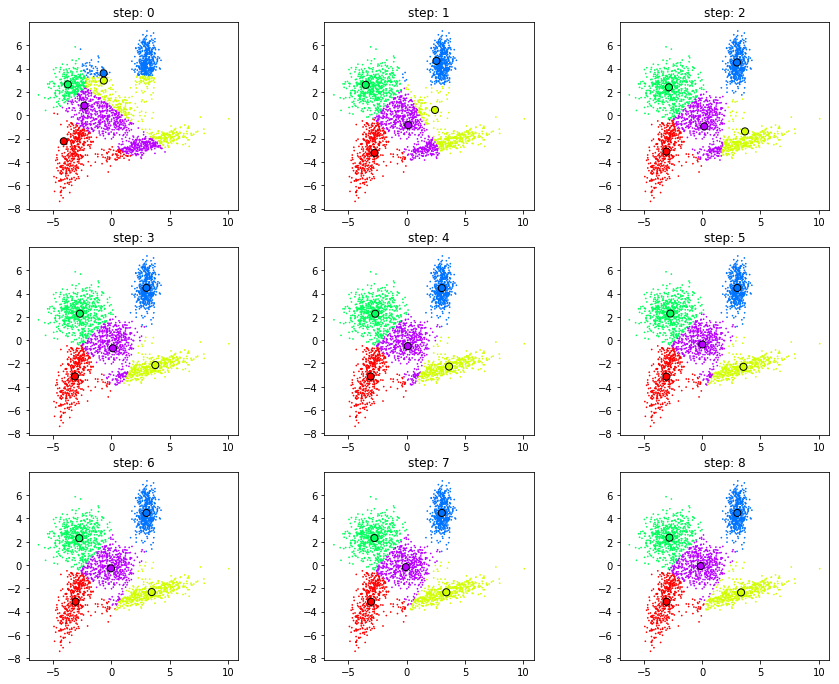

In [13]:
km.prepare_plot()
for x in range(9):
    
    km.estep()
    km.plot("step: %d"%(x))
    
    km.mstep()